<a href="https://colab.research.google.com/github/OhJunYoung21/artificial-inteliigence/blob/main/Jarvis_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd


f = pd.read_csv('/content/tomato.csv',encoding = 'cp949')

tomato_df = pd.DataFrame(f)

tomato_df

,Name,Rating,Directed By,Runtime,Studio,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,PG (for rude humor and action),Thurop Van Orman,100,Columbia Pictures,73,107,84,"4,023"
1,Legend Of The Demon Cat (K청kai),NR,Kaige Chen,129,Well Go USA,91,11,37,74
2,Dora and the Lost City of Gold,PG (for action and some impolite humor),James Bobin,102,Paramount Pictures,84,148,88,"6,715"
3,Luce,R (for language throughout sexual content nud...,Julius Onah,109,NEON,91,151,77,284
4,Good Boys,R (for strong crude sexual content drug and a...,Gene Stupnitsky,95,Universal Pictures,80,237,86,"13,007"
...,...,...,...,...,...,...,...,...,...
2095,The Boy And The Beast (Bakemono No Ko),R (for strong combat violence throughout bloo...,Michael Bay,144,Paramount Pictures,51,67,82,"33,491"
2096,The Other Side of the Door,R (for strong sexual content graphic nudity a...,Charlie Kaufman Duke Johnson,96,Starburns Industries,92,37,71,"19,600"
2097,Touched With Fire,R (for violence and language throughout.),Paco Cabezas,90,Circle of Confusion,44,50,55,"6,208"
2098,The Funhouse Massacre,R (for language and some violence/torture),Florian Gallenberger,110,Majestic Filmproduktion,26,14,61,"3,914"


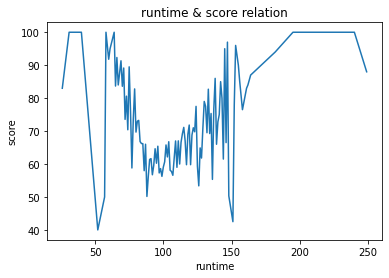

In [5]:
Run_1 = tomato_df.groupby(by='Runtime')


RUN_1 = pd.DataFrame(Run_1['TOMATOMETER score'].mean())

import matplotlib.pyplot as plt


plt.title('runtime & score relation')
plt.xlabel('runtime')
plt.ylabel('score')
plt.plot(RUN_1)
plt.show()


In [6]:
import numpy as np


rate = tomato_df.groupby('Rating')['TOMATOMETER score'].mean()


rate = pd.DataFrame(rate)

num_1 = np.arange(0,len(rate.index),1).tolist()

rate  = pd.DataFrame({'Rating':rate.index,
                      'TOMATOMETER score':rate['TOMATOMETER score']},
                     index = num_1,columns = ['Rating','TOMATOMETER score']
                      )


rate['TOMATOMETER score'] = tomato_df['TOMATOMETER score']

rate

,Rating,TOMATOMETER score
0,G,73
1,NC17,91
2,NR,84
3,NR (for bloody violence language and some sex...,91
4,NR (for bloody violence language throughout a...,80
...,...,...
960,R (for zombie violence/gore and for language),54
961,R (or violence sexual content/nudity and lang...,44
962,R (some violence),93
963,R (strong violence a rape disturbing images a...,82


In [7]:
rating = []


for j in rate['Rating']:
  if ' (' in j:
    new_list = j.split('(')
    rating.append(new_list[0])
  else:
    continue

#rating = rate['Rating'][:3].tolist() + rating


final = rate.iloc[:961,:]


final['Rating'] = ['G','NC17'] + rating

rate_graph =  pd.DataFrame(final.groupby('Rating')['TOMATOMETER score'].mean())

rate_graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TOMATOMETER score
Rating,
NR,73.142857
PG,63.563025
PG-13,64.591837
R,65.958647
G,73.000000
NC17,91.000000


프로젝트의 목적:
1.score을 예측할 때 사용하는 훈련데이터가 rating,runtime,audience count 등을 사용할 건데 자료형이 object인 경우가 있어서 corr(),시각화에 어려움이 있습니다. 이 문제를 어떻게 해결해야 할까요?


2.예를 들어 영화점수가 런타임도 길고, 배급사나 등급이 ~할 때 제일 좋더라 라는 결론을 얻고 싶습니다. 쉽게 말해서 매개변수가 2개 이상인 경우에는 어떻게 데이터를 전처리해야 하며, 어떤 모델을 써야 하나요?



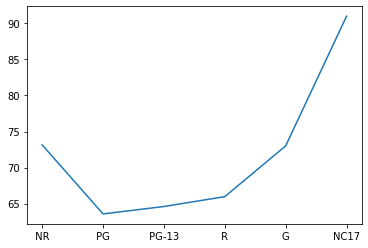

In [8]:
plt.plot(rate_graph)
plt.show()    #각 등급별로 영화의 평점을 그래프로 나타내었다.

In [9]:
tomato_1 = pd.get_dummies(tomato_df)

tomato_1.columns

Index(['Runtime', 'TOMATOMETER score', 'TOMATOMETER Count', 'AUDIENCE score',
       'Name_09월 11일', 'Name_1 Night (One Night)', 'Name_10  Gone',
       'Name_100 Streets', 'Name_10x10', 'Name_11  (11 Minut)',
       ...
       'AUDIENCE count_965', 'AUDIENCE count_97', 'AUDIENCE count_971',
       'AUDIENCE count_973', 'AUDIENCE count_98', 'AUDIENCE count_983',
       'AUDIENCE count_984', 'AUDIENCE count_987', 'AUDIENCE count_99',
       'AUDIENCE count_991'],
      dtype='object', length=7079)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


score_data = tomato_df['AUDIENCE score']
score_target = tomato_df['TOMATOMETER score']


x_train,x_test,y_train,y_test = train_test_split(score_data,score_target,random_state = 0)


x_train = x_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]    #1차원의 배열로는 학습이 불가능하기 때문에 np.newaxis를 사용해서 차원을 늘려주었습니다.

lin_1 = LinearRegression()
lin_1.fit(x_train,y_train)


score = lin_1.score(x_test,y_test)  #score를 알아봅시다.


print("선형회귀를 사용했을 때의 점수(지도학습):{:.2f}".format(score))  #소수점 2번째 자리까지 출력할 것이다.

선형회귀를 사용했을 때의 점수(지도학습):0.31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


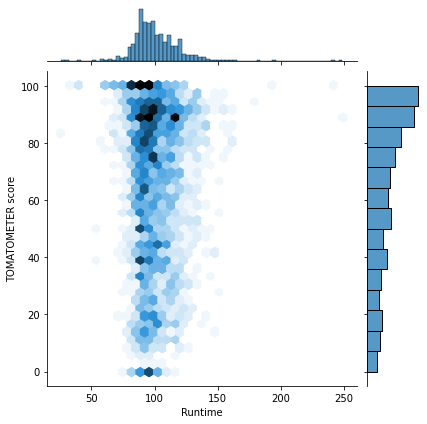

In [11]:
import seaborn as sns
sns.jointplot(data=tomato_df,x='Runtime',y='TOMATOMETER score',kind="hex")

In [12]:
tomato_df['Rating']

0                          PG (for rude humor and action)
1                                                      NR
2                 PG (for action and some impolite humor)
3        R (for language throughout sexual content nud...
4        R (for strong crude sexual content drug and a...
                              ...                        
2095     R (for strong combat violence throughout bloo...
2096     R (for strong sexual content graphic nudity a...
2097            R (for violence and language throughout.)
2098           R (for language and some violence/torture)
2099              PG-13 (for some violence and language.)
Name: Rating, Length: 2100, dtype: object

In [13]:
text_train ,y_train  = tomato_df['Rating'],tomato_df['TOMATOMETER score']

In [23]:
print('text_Train의 길이:',len(text_train))
print("text_train의 타입:",type(text_train))
print("text_train[10]:\n",text_train[10])

text_Train의 길이: 2100
text_train의 타입: <class 'pandas.core.series.Series'>
text_train[10]:
  R (for some disturbing violence)


In [28]:
y_train.unique()  #어떤 평점들이 존재하는지를 보여주는 기능을 합니다.unique()

array([ 73,  91,  84,  80,  67,  90,  61,  98,  39,  59,  44,  83,  96,
        64,  68,  70,   0,  71,  94,  50, 100,  38,  88,  43,  81,  78,
        53,  42,  89,  97,  60,  11,  32,  20,  41,  37,  75,  82,  79,
        55,  47,  92,  57,  76,  85,  13,  65,  25,  87,  74,  31,  14,
        63,  36,  16,  27,  86,  23,  95,   5,  62,  72,  18,  58,  30,
        45,  40,  99,  93,  46,  15,  69,  29,  33,  28,  21,  17,  34,
        19,  77,  56,  12,  54,   8,  10,  48,  66,   9,  35,  51,  22,
        52,  26,   7,  24,   6,  49,   4,   3])

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

CountVectorizer()

In [33]:
words = text_train.tolist()

In [34]:
vect.fit(words) #이 메서드(method:방법)은 훈련데이터를 토큰으로 나눠주고 어휘사전을 구축하여 vocabulary_라는 속성에 저장해준다.

CountVectorizer()

In [ ]:
vect.vocabulary_  #뒤에 따라오는 숫자는 알파벳상 순서를 의미합니다.

In [37]:
train_words = vect.transform(words)

print("Bag of Words:",repr(train_words))  #repr의 의미는?

Bag of Words: <2100x184 sparse matrix of type '<class 'numpy.int64'>'
	with 10501 stored elements in Compressed Sparse Row format>


In [39]:
train_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

train_words는 행렬로 이루어져 있다. 이때 배열로 바꾸면 0,1,로 이루어져 있는데 그 이유는 예를 들어 words의 첫번째 요소가 NR이라고 하자, 이때 어휘사전의 첫번째 요소는 13이다. 그러면 13은 NR에 등장하지 않으므로 0을 가지게 된다. 반면 어휘사전의 요소를 words가 가지게 되면 1을 띈다.

In [44]:
print("어휘사전의 길이:",len(vect.vocabulary_))
print("훈련데이터의 길이:",len(words))   
#이 값들을 곱해주면 repr(train_words)의 모양이 된다.(184x2100)

어휘사전의 길이: 184
훈련데이터의 길이: 2100


In [50]:
vect = CountVectorizer().fit(text_train)
x1_train  = vect.transform(text_train)
repr(x1_train)  #마찬가지로 2100x184의 행렬이다.

"<2100x184 sparse matrix of type '<class 'numpy.int64'>'\n\twith 10501 stored elements in Compressed Sparse Row format>"

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000),x1_train,y_train,cv=10)
print("교차검증 평균점수:{:.2f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


교차검증 평균점수:0.07


In [65]:
from matplotlib.scale import LogisticTransform
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}  #매개변수의 범위를 지정해줍니다. 저중 에서 가져다 쓰겠다는 의미입니다.
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,cv=5)
grid.fit(x1_train,y_train)
print("최상의 교차검증 점수:{:.2f}".format(grid.best_score_))
print("최적의 매개변수:",grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


최상의 교차검증 점수:0.07
최적의 매개변수: {'C': 0.1}
